# NAIVE BAYES


In [42]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split

In [7]:
df = pd.read_csv("C:/Users/kakem/Desktop/ML IMPLEMENTATIONS/Implementations/datasets/titanic.csv")
df.head()

,PassengerId,Survived,Pclass,Lname,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,Braund,Mr. Owen Harris,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,Cumings,Mrs. John Bradley (Florence Briggs Thayer),female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,Heikkinen,Miss. Laina,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,Futrelle,Mrs. Jacques Heath (Lily May Peel),female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,Allen,Mr. William Henry,male,35.0,0,0,373450,8.0500,NaN,S


## 1.DATA CLEANING

In [12]:
df.drop(columns = ["PassengerId", "Lname", "SibSp", "Cabin", "Embarked", "Fare", "Parch"], inplace = True)

KeyError: "['PassengerId', 'Lname', 'SibSp', 'Cabin', 'Embarked', 'Fare', 'Parch'] not found in axis"

In [13]:
df.drop(columns = ["Ticket"], inplace = True)

In [15]:
df.drop(columns = ["Name"], inplace = True)

In [16]:
df.head()

,Survived,Pclass,Sex,Age
0,0,3,male,22.0
1,1,1,female,38.0
2,1,3,female,26.0
3,1,1,female,35.0
4,0,3,male,35.0


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  156 non-null    int64  
 1   Pclass    156 non-null    int64  
 2   Sex       156 non-null    object 
 3   Age       126 non-null    float64
dtypes: float64(1), int64(2), object(1)
memory usage: 5.0+ KB


In [ ]:
# new_df = df.dropna(axis=0)

In [20]:
df.dropna(inplace = True, axis = 0)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 126 entries, 0 to 155
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  126 non-null    int64  
 1   Pclass    126 non-null    int64  
 2   Sex       126 non-null    object 
 3   Age       126 non-null    float64
dtypes: float64(1), int64(2), object(1)
memory usage: 4.9+ KB


In [21]:
gender = pd.get_dummies(df["Sex"])
gender

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
150,0,1
151,1,0
152,0,1
153,0,1


In [24]:
df.drop(columns = ["Sex"], inplace=True)

KeyError: "['Sex'] not found in axis"

In [26]:
df.head(10)

,Survived,Pclass,Age
145,0,2,19.0
146,1,3,27.0
147,0,3,9.0
148,0,2,36.5
149,0,2,42.0
150,0,2,51.0
151,1,1,22.0
152,0,3,55.5
153,0,3,40.5
155,0,1,51.0


In [27]:
new_df = pd.concat([df, gender], axis=1)
new_df

,Survived,Pclass,Age,female,male
0,0,3,22.0,0,1
1,1,1,38.0,1,0
2,1,3,26.0,1,0
3,1,1,35.0,1,0
4,0,3,35.0,0,1
...,...,...,...,...,...
150,0,2,51.0,0,1
151,1,1,22.0,1,0
152,0,3,55.5,0,1
153,0,3,40.5,0,1


In [29]:
X = new_df.iloc[:,1:]
y = new_df.iloc[:, 0]

## 2.SPLITTING THE DATA INTO TRAIN AND TEST

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1)
X_train

,Pclass,Age,female,male
143,3,19.0,0,1
90,3,29.0,0,1
86,3,16.0,0,1
131,3,20.0,0,1
75,3,25.0,0,1
...,...,...,...,...
10,3,4.0,1,0
93,3,26.0,0,1
13,3,39.0,0,1
135,2,23.0,0,1


## 3.MODEL IMPLEMENTATION

In [37]:
model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB()

In [38]:
y_pred = model.predict(X_test)

## 4.CALCULATING THE METRICS

In [43]:
accuracy = accuracy_score(y_pred, y_test)
recall = recall_score(y_pred, y_test)
precision = precision_score(y_pred, y_test)
f1_score = f1_score(y_pred, y_test)

print(f"Accuracy:{accuracy}\nRecall: {recall}\nPrecision: {precision}\nf1_score: {f1_score}")

Accuracy:0.84375
Recall: 0.5833333333333334
Precision: 1.0
f1_score: 0.7368421052631579


[[20  0]
 [ 5  7]]


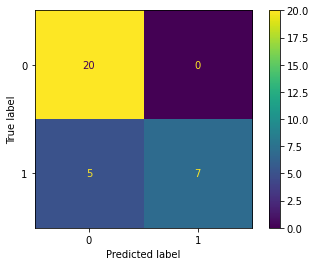

In [45]:
cm = confusion_matrix(y_pred, y_test, labels=model.classes_)
print(cm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()